In [1]:
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

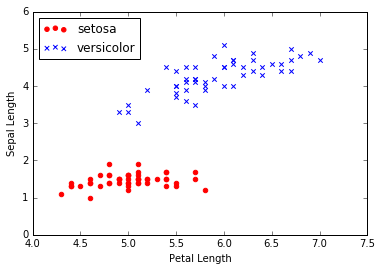

In [5]:
y = df.iloc[0:100,4].values
y = np.where( y=='Iris-setosa', -1, 1 )
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.show()

In [76]:
#     ADAptive LInear NEuron (ADALINE) by Bernard Widrow and Tedd Hoff 
#     Illustrates the key concept of defining and minimizing cost functions, 
#     which will lay the ground work for understanding more advanced machine learning algorithms for classification, 
#     such as logistic regression and support vector machines, etc.

#     Key difference between Widrow-Hoff rule and Rosenblatt's Perceptron is that
#     the weights are updated based on a linear activation function rather than a unit step function
#     i.e., [1 x] * weights - sum - linear activation - (compute errors) - quantizer - output

#     Compared to Rosenblatt's Perceptron, in ADALINE, the weight update is calculated based on all samples
#     in the training set (instead of updating the weights incrementally after each sample),
#     which is why this approach is also referred to as "batch" gradient descent.
class AdalineSGD(object):
    """
    Parameters: eta, num_iter
    Attributes: weights, errors, shuffle(bool), random_state(int)
    """
    
    def __init__(self, eta=0.01, num_iter=10, bShuffle=True, random_state=None, minibatch_size=10):
        self.eta = eta
        self.num_iter = num_iter
        self.weights_initialized = False
        self.bShuffle = bShuffle
        self.minibatch_size = minibatch_size
        if random_state:
            np.random.seed(random_state)
        
    def train(self, X, y):
        """
        X: {array-like}, shape=[num_samples, num_features]
        y: {array-like}, shape=[num_samples]
        """
        self.initialize_weights(X.shape[1])
        self.cost = []
        
        for i in range(self.num_iter):
            if self.shuffle:
                X, y = self.shuffle(X, y)
            cost = []
            
            for i in range(0, X.shape[0], self.minibatch_size):
                if (i+self.minibatch_size) <= X.shape[0]:
                    xi = X[i:i+self.minibatch_size]
                    target = y[i:i+self.minibatch_size]
                else:
                    xi = X[i:]
                    target = y[i:]
                cost.append(self.update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost.append(avg_cost)
            
        return self
                
    def partial_train(self, X, y):
        if not self.weights_initialized:
            self.initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self.update_weights(xi, target)
        else:
            self.update_weights(X, y)
        return self
    
    def shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def initialize_weights(self, m):
        self.weights = np.zeros(1+m)
        self.weights_initialized = True
        
    def update_weights(self, X, y):
        grad = np.zeros(self.weights.shape)
        errors = 0
        for xi, target in zip(X, y):
            output = self.net_input(xi)
            error = (target - output)
            grad[1:] += xi.dot(error)
            grad[0] += error
            errors += error
            
        self.weights[1:] += self.eta * grad[1:]
        self.weights[0] += self.eta * grad[0]
        cost = 0.5 * errors**2
        return cost
        
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [77]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0], y=X[y==c1,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)

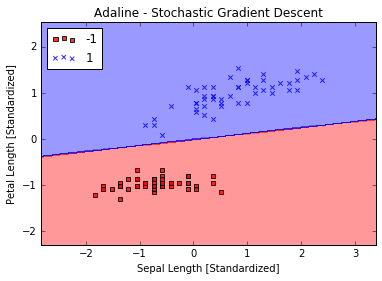

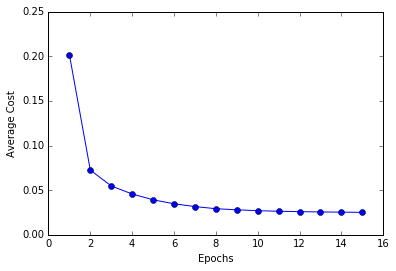

In [79]:
# Benefitting from Standardization
sX = np.copy(X)
sX[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
sX[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

classifier1 = AdalineSGD(eta=0.01, num_iter=15, random_state=1, minibatch_size=1)
classifier1.train(sX, y)

plot_decision_regions(sX, y, classifier=classifier1)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(classifier1.cost)+1), classifier1.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

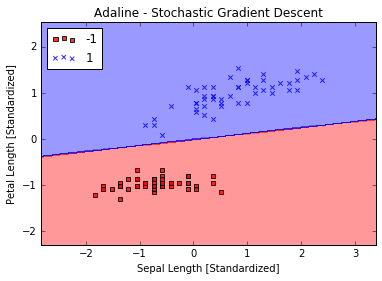

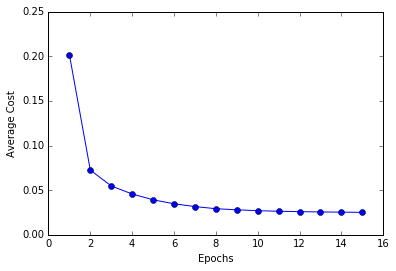

In [80]:
# Benefitting from Standardization
sX = np.copy(X)
sX[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
sX[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

classifier2 = AdalineSGD(eta=0.01, num_iter=15, random_state=1, minibatch_size=10)
classifier2.train(sX, y)

plot_decision_regions(sX, y, classifier=classifier2)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(classifier2.cost)+1), classifier2.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [83]:
print X[1:5]

[[ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]]
